In [27]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
#import datetime
import katpoint
import numpy as np
import time as time
import pandas as pd
import math

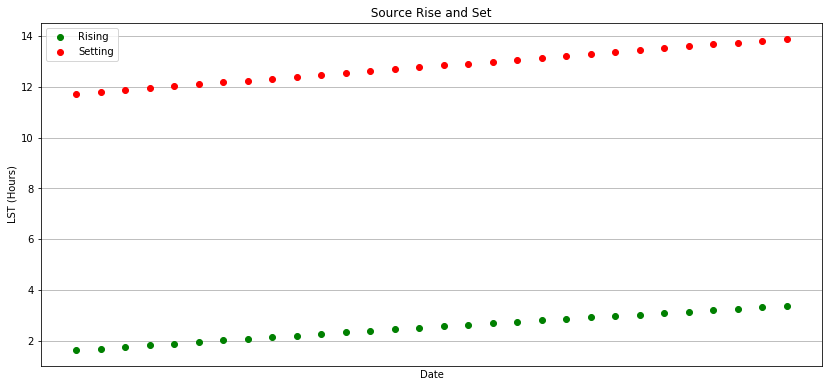

In [65]:

def rise_set(timestamp):
    site = katpoint.Antenna("m000, -30:42:39.8, 21:26:38.0, 1086.6, 13.5") # the site position using one antenna(m000)
    site.observer.date=katpoint.Timestamp(timestamp).to_ephem_date() # Set time
    site.observer.horizon='00:00:00.0' # Set horizon
    observer = site.observer 
    Sun= katpoint.Target("Sun,special")# Make sun object
    ephem_sun = Sun.body #Sun as an object
    ephem_sun.compute(observer) #compute for position of the observer
    return observer.next_rising(ephem_sun),observer.next_setting(ephem_sun)

site = katpoint.Antenna("m000, -30:42:39.8, 21:26:38.0, 1086.6, 13.5")
settime,risetime = np.zeros((30,2)),np.zeros((30,2))
for day in range(30):
    #timestamp = katpoint.Timestamp() + 24*60*60*day
    time_ = dt.datetime(2023, 7, 1,1,0,0)
    t = dt.datetime.timestamp(time_)
    timestamp = t + 24*60*60*day
    #print(timestamp)
    rise_time,set_time = rise_set(timestamp)
    risetime[day] =katpoint.Timestamp(rise_time),np.degrees(site.local_sidereal_time(rise_time))/15.
    settime[day] =katpoint.Timestamp(set_time),np.degrees(site.local_sidereal_time(set_time))/15.
    # Array values are unix time and decimal LST time in hours


fig = plt.figure(figsize=(14,7))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())

dates=[dt.datetime.fromtimestamp(ts) for ts in risetime[:,0]]
plt.plot(risetime[:,1],'go',label="Rising")
dates2=[dt.datetime.fromtimestamp(ts) for ts in settime[:,0]]
plt.plot(settime[:,1],'ro',label="Setting")

plt.title(" Source Rise and Set ")
plt.ylabel('LST (Hours)')
plt.xlabel('Date')
plt.gcf().autofmt_xdate()
plt.grid()
plt.legend()


In [66]:
def nighttime(riset,sett):
    'Arranging LST rise and set time to show night time '
    ind1 = 0
    ind2 = -1
       
    rt_new = np.delete(riset, ind1)
    st_new = np.delete(sett,ind2)
    setrise = {}
    for i in range(len(riset)-1):
        setrise[i] = [st_new[i],rt_new[i]]
    return setrise

In [67]:
def nightobs(filename, datefile):
    'Extracting only night time observations\
    from a given file of observational information'
    ndates = []
    for j in range(len(datefile)):
        ndates.append(datefile[j].strftime('%Y-%m-%d'))
    data = pd.read_csv(filename)
    night_obs = data['night_obs']
    LST_starts = data['lst_start']
    LST_ends = data['lst_start_end']
    duration = data['simulated_duration']
    proposal_id = data['proposal_id']
    #proposal_id = sorted(proposal_id)
    ID = data['id']
    
    obs = {}
    for i in range(len(night_obs)):
        if night_obs[i] == 'Yes':
            obs[ID[i]] = [proposal_id[i],LST_starts[i],LST_ends[i],duration[i]]
    return obs,ndates

In [68]:
obs,date = nightobs('all_night_obs.csv', dates)
duration_ = []
LST_start = []
LST_end = []
for i in obs.values():
    duration_.append(round(i[3]/3600,2))    
    g1 = i[1].replace(':', '.')
    f1 = float(g1)
    LST_start.append(f1)
    g2 = i[2].replace(':', '.') 
    f2 = float(g2)
    LST_end.append(f2)

#duration_ = [item for item in duration_ if not(math.isnan(item)) == True] #removing nan
duration_ = [0 if math.isnan(x) else x for x in duration_]
#duration_.insert(-2,0)

print(LST_start)
print(LST_end)
print(duration_)

[19.45, 20.3, 14.0, 23.15, 14.0, 23.0, 9.0, 9.0, 9.0, 8.1, 8.1, 5.23, 5.23, 12.0, 12.0, 7.4, 20.0, 1.3, 13.0, 3.0, 14.0, 9.0, 2.2, 19.03, 22.29, 12.0, 23.15, 23.3, 17.55, 19.45, 11.35, 20.47, 21.45, 19.45, 19.17, 19.54, 18.0, 12.3, 20.55, 20.55, 20.55, 20.55, 20.55, 20.55, 20.55, 20.55, 20.55, 20.55, 21.2, 19.3, 19.3, 19.3, 19.3, 19.3, 19.3, 19.3, 19.3, 19.3, 19.3, 19.3, 8.0, 11.0, 14.52, 20.0, 1.3, 9.0, 9.0, 5.05, 1.5, 22.07, 1.5, 22.07, 20.0, 22.0, 0.53, 2.15, 20.55, 18.1, 22.3, 22.3, 22.3, 22.3, 22.3, 18.1, 18.1, 18.1, 18.1, 19.3, 5.3, 5.3, 5.3, 22.15, 23.0, 22.15, 22.15, 22.15, 22.15, 23.0, 6.4, 6.0, 5.05, 23.0, 18.36, 1.3, 18.54, 18.2, 18.24, 18.2, 18.36, 7.45, 0.0, 19.54, 19.17, 11.45, 11.45, 11.45, 11.45, 11.45, 11.45, 11.15, 22.07, 12.0, 12.3, 10.0, 9.0, 6.3, 6.0, 5.3, 1.5, 11.4, 12.0, 12.0, 9.3, 9.0, 8.0, 6.0, 18.48, 21.45, 19.45, 20.47, 9.55, 21.05, 6.0, 12.0, 8.3, 18.37, 17.15, 7.3, 5.4, 7.3, 5.3, 5.4, 3.4, 22.0, 20.0, 23.11, 12.0, 13.0, 5.3, 23.46, 17.32, 6.0, 9.51, 8.19, 8

In [69]:
rt = risetime[:,1]
st = settime[:,1]
SetRise = nighttime(rt,st)

print(SetRise)

{0: [11.738365603333106, 1.687365071049374], 1: [11.810704981851128, 1.7525482883579577], 2: [11.883281655901227, 1.8173158364011426], 3: [11.956087663191878, 1.8816921455796864], 4: [12.029115268666338, 1.9456668403302748], 5: [12.102357085958637, 2.0092388498771547], 6: [12.175806015908089, 2.0724075805884934], 7: [12.249454986570615, 2.1351727458153733], 8: [12.32329664399286, 2.1975341508939876], 9: [12.397323114433117, 2.2594915249203007], 10: [12.471525910433467, 2.3210444517540747], 11: [12.545895959527748, 2.3821923952737567], 12: [12.62042372387924, 2.4429347906322216], 13: [12.695099365587225, 2.5032711576168976], 14: [12.769912929801608, 2.563201221108314], 15: [12.84485449993335, 2.6227250100567234], 16: [12.919914333383582, 2.681842939803611], 17: [12.995082945839458, 2.740555855644951], 18: [13.070351166811301, 2.798865059565634], 19: [13.145710159980888, 2.8567723047611446], 20: [13.221151418687944, 2.914279778984012], 21: [13.296666767344421, 2.9713901060236254], 22: [1

In [34]:
rt = risetime[:,1]
st = settime[:,1]

SetRise = nighttime(rt,st)
#print(len(SetRise))
for i in SetRise.values():
    settimes = i[0]
    risetimes = i[1]
    names = []
    for name in obs.keys():
        names.append(name)
    d_start = []
    d_end = []
    d_added_s = []
    d_added_e = []
    for ind, x in enumerate(LST_start):
        if x > settimes:
            d_added_s.append([x + duration_[ind], ind])


        elif LST_end[ind] > settimes:
             d_added_e.append([LST_end[ind] + duration_[ind], ind])

                
#Condition 1 based on the LST start time of the observation. 
    if len(d_added_s) != 0:
        sub_start = []
    
        for ind2 in range(len(d_added_s)):
            if d_added_s[ind2][0] > 24 and (d_added_s[ind2][0]-24) < risetimes:
                d_start.append(names[d_added_s[ind2][1]])
            else:
                d_start.append(names[d_added_s[ind2][1]])
    else:
        break

#Condition 2 based on the LST end time of the observation.    
    if len(d_added_e) != 0:
        sub_end = []

        for ind3 in range(len(d_added_e)):
            if d_added_e[ind3][0] > 24 and d_added_e[ind3][0]-24 < risetimes:
                d_end.append(names[d_added_e[ind3][1]])
            else:
                d_end.append(names[d_added_e[ind3][1]])
    else:
        break
                          
for j in obs.keys():
    if j in d_start:
        print("{} can run this month with LST start of {} due to condition 1 ".format(j, obs[j][1]))
    elif j in d_end:
        print("{} can run this month with LST start of {} due to condition 2".format(j, obs[j][0]))
        

20221202082558 can run this month with LST start of 19:45 due to condition 1 
20221128085912 can run this month with LST start of 20:30 due to condition 1 
20221122153927 can run this month with LST start of 14:00 due to condition 1 
20221121190323 can run this month with LST start of 23:15 due to condition 1 
20221114110116 can run this month with LST start of 14:00 due to condition 1 
20221108210952 can run this month with LST start of 23:00 due to condition 1 
20221106185438 can run this month with LST start of 9:00 due to condition 1 
20221106184558 can run this month with LST start of 9:00 due to condition 1 
20221106182754 can run this month with LST start of 9:00 due to condition 1 
20221103104516 can run this month with LST start of 8:10 due to condition 1 
20221103101730 can run this month with LST start of 8:10 due to condition 1 
20221103101001 can run this month with LST start of 5:23 due to condition 1 
20221103095709 can run this month with LST start of 5:23 due to condit

In [10]:
rt = risetime[:,1]
st = settime[:,1]
d_start = []
d_end = []
d_added_e = []
d_added_s = []
SetRise = nighttime(rt,st)
#print(len(SetRise))
for i in SetRise.values():
    #d_added_s = []
    settimes = i[0]
    risetimes = i[1]
    names = []
    for name in obs.keys():
        names.append(name)
    #d_added_s = []
    for ind, x in enumerate(LST_start):
        if settimes - risetimes > 0:
            if x > settimes and x - settimes > 0:
                d_added_s.append([x + duration_[ind], ind])
            elif 0 < x < risetimes:
                d_added_s.append([x + duration_[ind], ind])
            elif LST_end[ind] > settimes or 0 < LST_end[ind] < risetimes:
                d_added_e.append([LST_end[ind] + duration_[ind], ind])


        elif settimes - risetimes < 0:
            if x > settimes and 0 < x < risetimes:
                d_added_s.append([x + duration_[ind], ind])
            elif LST_end[ind] > settimes and 0 < x < risetimes:
                d_added_s.append([x + duration_[ind], ind])


                
#Condition 1 based on the LST start time of the observation. 
    if len(d_added_s) != 0:
        sub_start = []
    
        for ind2 in range(len(d_added_s)):
            if d_added_s[ind2][0] > 24 and (d_added_s[ind2][0]-24) < risetimes:
                d_start.append(names[d_added_s[ind2][1]])
            else:
                d_start.append(names[d_added_s[ind2][1]])
    else:
        break

#Condition 2 based on the LST end time of the observation.    
    if len(d_added_e) != 0:
        sub_end = []

        for ind3 in range(len(d_added_e)):
            if risetimes - d_added_e[ind3][0] >= duration_[ind3]:
                if d_added_e[ind3][0] > 24 and (d_added_e[ind3][0]-24) < risetimes:
                    d_end.append(names[d_added_e[ind3][1]])
                else:
                    d_end.append(names[d_added_e[ind3][1]])
    else:
        break
        
        

                          
for j in obs.keys():
    if j in d_start:
        print("{} can run this month with LST start of {} due to condition 1 ".format(j, obs[j][1]))
    elif j in d_end:
        print("{} can run this month with LST start of {} due to condition 2".format(j, obs[j][1]))
        

20221202082558 can run this month with LST start of 19:45 due to condition 1 
20221128085912 can run this month with LST start of 20:30 due to condition 1 
20221122153927 can run this month with LST start of 14:00 due to condition 1 
20221114110116 can run this month with LST start of 14:00 due to condition 1 
20221106185438 can run this month with LST start of 9:00 due to condition 1 
20221106184558 can run this month with LST start of 9:00 due to condition 1 
20221106182754 can run this month with LST start of 9:00 due to condition 1 
20221103104516 can run this month with LST start of 8:10 due to condition 1 
20221103101730 can run this month with LST start of 8:10 due to condition 1 
20221026191415 can run this month with LST start of 12:00 due to condition 1 
20221025200551 can run this month with LST start of 12:00 due to condition 1 
20221025194144 can run this month with LST start of 7:40 due to condition 1 
20221025025914 can run this month with LST start of 20:00 due to condi